# This Notebook plots distribution of structures containing tunnels and their associated bottleneck radius


In [1]:
# Useful stuff
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import glob
import pickle
import seaborn as sns


# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots
import pyemma.coordinates as coor
import gc

# Loop Distance

In [2]:
Traj_directory = "/Volumes/Nia_HardDrive/1A53/Clusters_3/DCDs/"
Top_directory = "/Volumes/Nia_HardDrive/1A53/Topology_aligned/"

# PCA main minima DCD files
APO_Designed_min1 = Traj_directory + "1A53_D_apo_cluster_0.dcd"
APO_Designed_min2 = Traj_directory + "1A53_D_apo_cluster_1.dcd"
APO_Designed_min3 = Traj_directory + "1A53_D_apo_cluster_2.dcd"

APO_Shell_min1 = Traj_directory + "1A53_S_apo_cluster_0.dcd"
APO_Shell_min2 = Traj_directory + "1A53_S_apo_cluster_1.dcd"
APO_Shell_min3 = Traj_directory + "1A53_S_apo_cluster_2.dcd"

APO_Core_min1 = Traj_directory + "1A53_C_apo_cluster_0.dcd"
APO_Core_min2 = Traj_directory + "1A53_C_apo_cluster_1.dcd"
APO_Core_min3 = Traj_directory + "1A53_C_apo_cluster_2.dcd"

APO_Evolved_min1 = Traj_directory + "1A53_E_apo_cluster_0.dcd"
APO_Evolved_min2 = Traj_directory + "1A53_E_apo_cluster_1.dcd"
APO_Evolved_min3 = Traj_directory + "1A53_E_apo_cluster_2.dcd"


# Topology files
APO_Designed_top = Top_directory+"3NYZ_A_am_aligned.pdb"
APO_Shell_top = Top_directory+"Shell_am_aligned.pdb"
APO_Core_top = Top_directory+"Core_am_aligned.pdb"
APO_Evolved_top = Top_directory+"Evolved_am_aligned.pdb"

In [3]:
trajfiles_apo = []
trajfiles_apo.append(APO_Designed_min1)
trajfiles_apo.append(APO_Shell_min1)
trajfiles_apo.append(APO_Core_min1)
trajfiles_apo.append(APO_Evolved_min1)

topfiles_apo = []
topfiles_apo.append(APO_Designed_top)
topfiles_apo.append(APO_Shell_top)
topfiles_apo.append(APO_Core_top)
topfiles_apo.append(APO_Evolved_top)


In [4]:
Designed_APO_1 = pt.load(APO_Designed_min1, APO_Designed_top,stride=100)
Designed_APO_2 = pt.load(APO_Designed_min2, APO_Designed_top,stride=100)
Designed_APO_3 = pt.load(APO_Designed_min3, APO_Designed_top,stride=100)

Shell_APO_1 = pt.load(APO_Shell_min1, APO_Shell_top,stride=100)
Shell_APO_2 = pt.load(APO_Shell_min2, APO_Shell_top,stride=100)
Shell_APO_3 = pt.load(APO_Shell_min3, APO_Shell_top,stride=100)

Core_APO_1 = pt.load(APO_Core_min1, APO_Core_top,stride=100)
Core_APO_2 = pt.load(APO_Core_min2, APO_Core_top,stride=100)
Core_APO_3 = pt.load(APO_Core_min3, APO_Core_top,stride=100)

Evolved_APO_1 = pt.load(APO_Evolved_min1, APO_Evolved_top,stride=100)
Evolved_APO_2 = pt.load(APO_Evolved_min2, APO_Evolved_top,stride=100)
Evolved_APO_3 = pt.load(APO_Evolved_min3, APO_Evolved_top,stride=100)

In [5]:
# Distance between Ca of residues 21 and 78 (numbering is -3 so 57 and 187)

distance_Designed_1 = pt.distance(Designed_APO_1,':57@CA :187@CA')
distance_Designed_2 = pt.distance(Designed_APO_2,':57@CA :187@CA')
distance_Designed_3 = pt.distance(Designed_APO_3,':57@CA :187@CA')

distance_Shell_1 = pt.distance(Shell_APO_1,':57@CA :187@CA')
distance_Shell_2 = pt.distance(Shell_APO_2,':57@CA :187@CA')
distance_Shell_3 = pt.distance(Shell_APO_3,':57@CA :187@CA')

distance_Core_1 = pt.distance(Core_APO_1,':57@CA :187@CA')
distance_Core_2 = pt.distance(Core_APO_2,':57@CA :187@CA')
distance_Core_3 = pt.distance(Core_APO_3,':57@CA :187@CA')

distance_Evolved_1 = pt.distance(Evolved_APO_1,':57@CA :187@CA')
distance_Evolved_2 = pt.distance(Evolved_APO_2,':57@CA :187@CA')
distance_Evolved_3 = pt.distance(Evolved_APO_3,':57@CA :187@CA')


17.98739303028368
2.2210254939201413
1567
11.9290642929248
2.307866562867283
1268
17.629644490113606
3.139289680004894
466
10.608410483154593
2.322845786033832
1788
23.490455229299933
2.3605118750946517
517
19.560644973431813
2.8156422734534003
997
14.970805986548655
1.8297356912346545
788
18.25405632556712
2.0063815601325357
702
11.598332979835847
1.8482102144686055
1811
12.903532052855699
3.651861835555018
2302
13.44606673273122
2.1398957482661354
631
29.143008485963584
3.3551002936299974
368


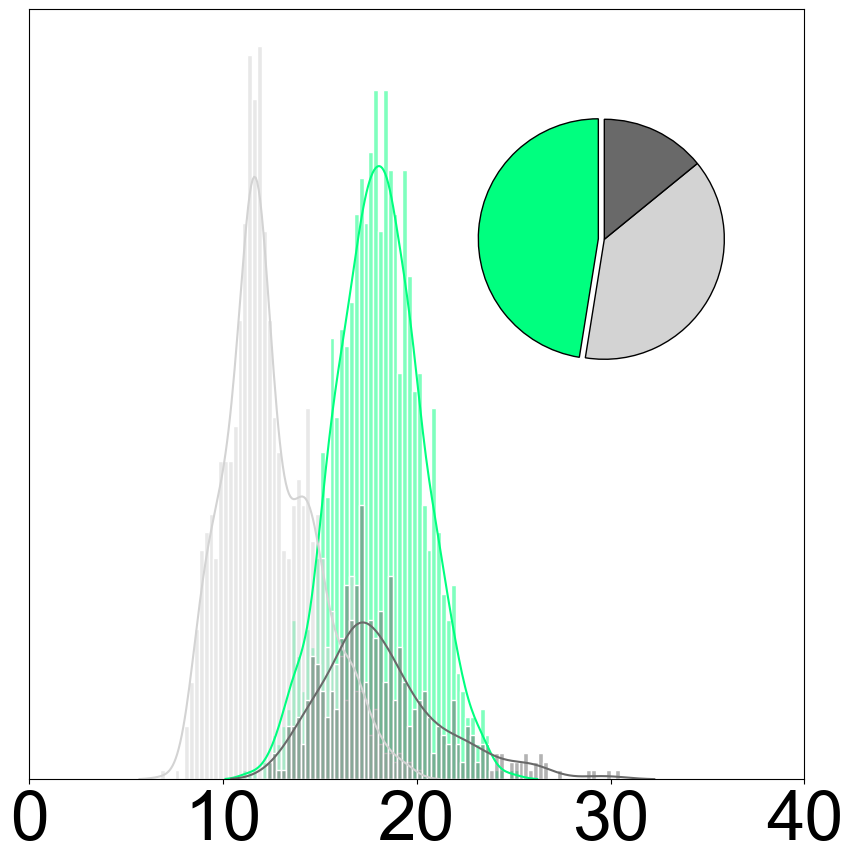

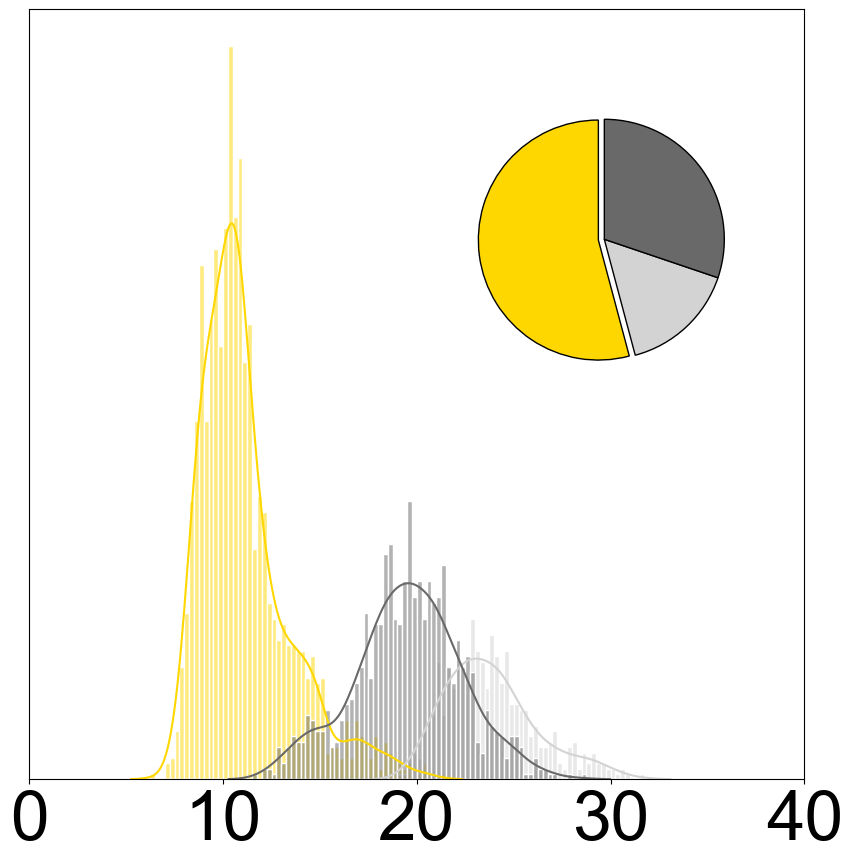

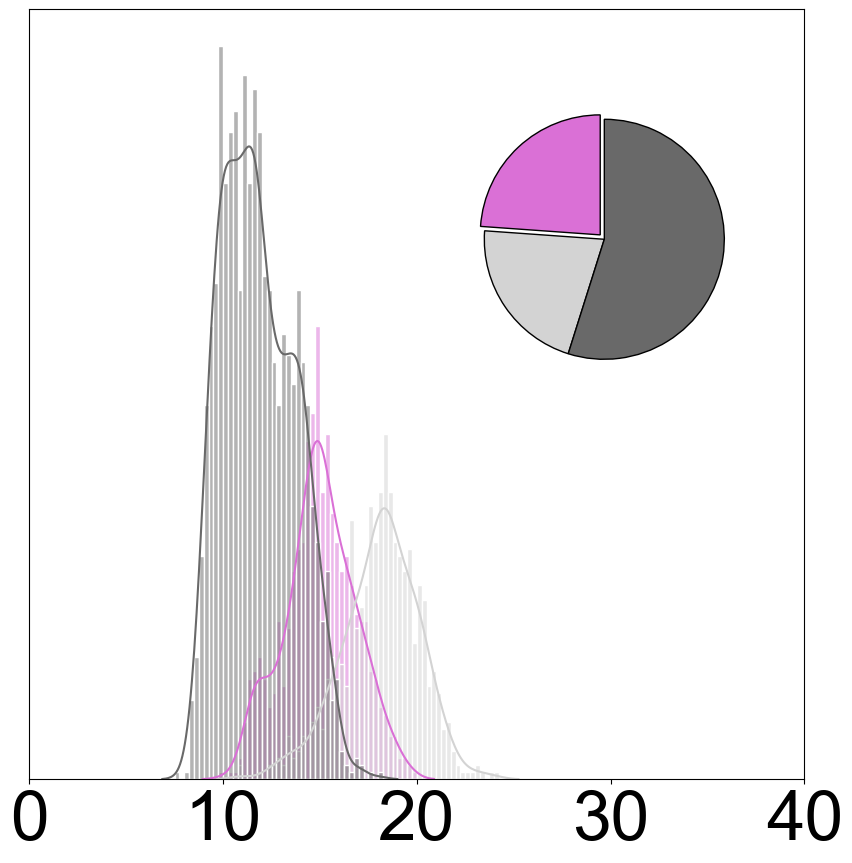

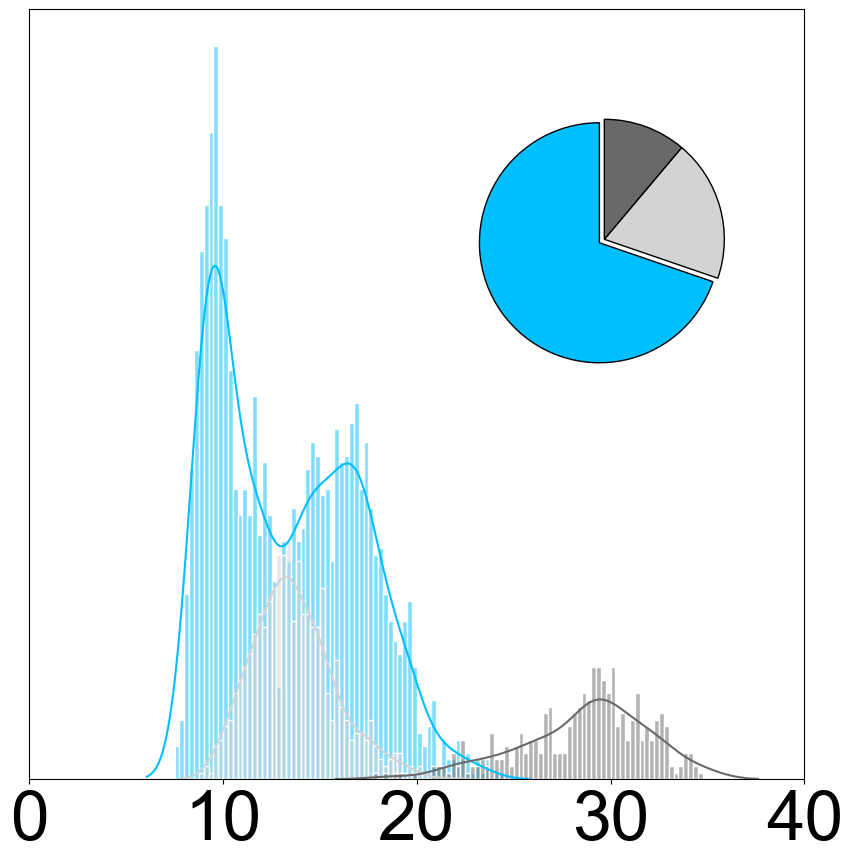

In [6]:
def distrplot(br_data,mcolor,title):
    plt.figure(figsize=(10,10))
    
    bins = np.arange(3,35,0.25)

    #plt.xlim(0.9,3.6)
    #plt.ylim(0,100)

    sns.histplot(br_data[0],  bins = bins, color=mcolor, alpha=0.5, stat = 'count',linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[0]))
    print(np.std(br_data[0]))
    print(len(br_data[0]))
       
    sns.histplot(br_data[1],  bins = bins, color='lightgrey', alpha=0.5, stat = 'count',linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[1]))
    print(np.std(br_data[1]))
    print(len(br_data[1]))
    
    sns.histplot(br_data[2],  bins = bins, color='dimgrey', alpha=0.5, stat = 'count',linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[2]))
    print(np.std(br_data[2]))
    print(len(br_data[2]))
    
    

    plt.xticks(np.arange(0,41,10),fontsize=50, fontname='Arial')
    #plt.yticks(np.arange(0,180,40),fontsize=50, fontname='Arial')
    plt.yticks([])
    
    plt.ylabel('')
    plt.axes([.55, .5, .3, .3], facecolor='y')
    plt.pie([len(br_data[0]),len(br_data[1]),len(br_data[2])],colors = [mcolor,'lightgrey','dimgray'],explode=(0.05,0,0),startangle=90,labeldistance=0.01,
            wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True},textprops={'fontsize': 50,'fontname' : 'Arial'})
    plt.savefig(str(title)+'.png',transparent=True,dpi='figure')
    
    
distrplot([distance_Designed_1,distance_Designed_2,distance_Designed_3],'springgreen','1A53_D_loops') 
distrplot([distance_Shell_1,distance_Shell_2,distance_Shell_3],'gold','1A53_S_loops') 
distrplot([distance_Core_1,distance_Core_2,distance_Core_3],'orchid','1A53_C_loops') 
distrplot([distance_Evolved_1,distance_Evolved_2,distance_Evolved_3],'deepskyblue','1A53_E_loops') 



# Plotting distributions as a whole

Peak at x = 6.875, y = 1
Peak at x = 11.875, y = 83
Peak at x = 17.125, y = 109
Peak at x = 22.625, y = 13
Peak at x = 30.375, y = 1
Region 1:
  Range: 3.00 to 9.38
  Relative Frequency: 0.0318
Region 2:
  Range: 9.38 to 14.50
  Relative Frequency: 0.3193
Region 3:
  Range: 14.50 to 19.88
  Relative Frequency: 0.5192
Region 4:
  Range: 19.88 to 26.50
  Relative Frequency: 0.1275
Region 5:
  Range: 26.50 to 39.75
  Relative Frequency: 0.0021


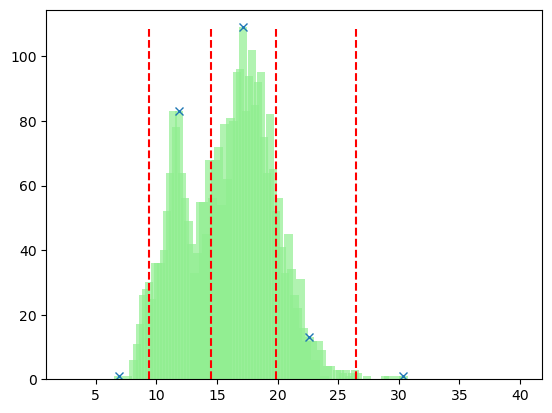

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

data = np.concatenate((distance_Designed_1,distance_Designed_2,distance_Designed_3))


bins = np.arange(3,40,0.25)

# Plotting the histogram
hist, bin_edges = np.histogram(data, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Find peaks
peaks, _ = find_peaks(hist,distance=20)

# Plot the histogram and the peaks
#plt.bar(bin_centers, hist, width=0.7, color='lightgreen', alpha=0.7)
#plt.plot(bin_centers[peaks], hist[peaks], "x")

# Show the plot
#plt.show()

# Print the peak values
for peak in peaks:
    print(f"Peak at x = {bin_centers[peak]}, y = {hist[peak]}")
    
    
# Calculate the midpoints between peaks
midpoints = [(bin_centers[peaks[i]] + bin_centers[peaks[i+1]]) / 2 for i in range(len(peaks) - 1)]

# Add boundaries for the first and last region
boundaries = [bin_edges[0]] + midpoints + [bin_edges[-1]]

# Dividing data based on boundaries
regions = []
for i in range(len(boundaries) - 1):
    region = data[(data >= boundaries[i]) & (data < boundaries[i + 1])]
    regions.append(region)

# Calculate relative frequencies
total_count = len(data)
relative_frequencies = [len(region) / total_count for region in regions]

# Print the regions and their relative frequencies
for i, region in enumerate(regions):
    print(f"Region {i+1}:")
    print(f"  Range: {boundaries[i]:.2f} to {boundaries[i+1]:.2f}")
    print(f"  Relative Frequency: {relative_frequencies[i]:.4f}")

# Plot the histogram and the peaks
plt.bar(bin_centers, hist, width=0.7, color='lightgreen', alpha=0.7)
plt.plot(bin_centers[peaks], hist[peaks], "x")
plt.vlines(midpoints, 0, max(hist), color='red', linestyle='--')  # Mark midpoints

# Show the plot
plt.show()

In [8]:
data2 = [round(x,1) for x in data]
indice_1 = data2.index(11.9)
indice_2 = data2.index(17.1)
indice_3 = data2.index(22.6)


print(indice_1+1,indice_2+1,indice_3+1)

1658 174 890


16.303264480314702
3301


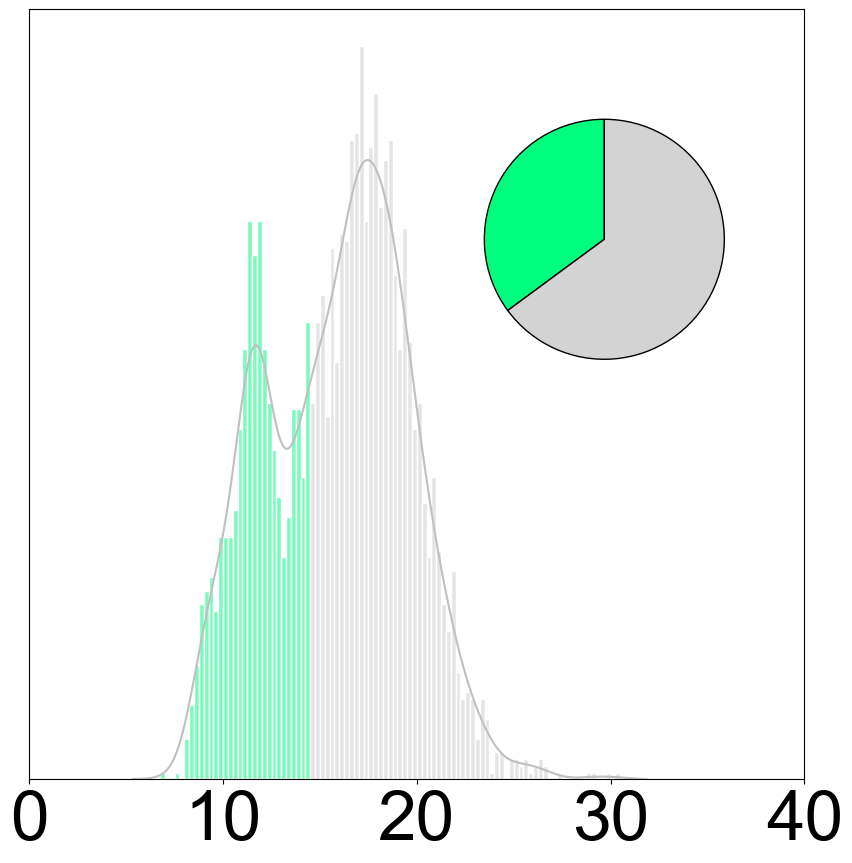

In [9]:
# Two distributions
def distrplot(br_data, mcolor, Freq1, Freq2,  title, group1_range, group2_range):
    plt.figure(figsize=(10, 10))
    
    bins = np.arange(3, 40, 0.25)
    
    plt.xlim(0,40)
    
    # Plot the histogram for the entire data
    sns.histplot(br_data[0], bins=bins, color='silver', alpha=0.1, stat='count', linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[0]))
    print(len(br_data[0]))
    
    # Plot the groups in different colors
    sns.histplot(br_data[0][(br_data[0] >= group1_range[0]) & (br_data[0] < group1_range[1])], bins=bins, color='springgreen', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group2_range[0]) & (br_data[0] < group2_range[1])], bins=bins, color='lightgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')

    plt.xticks(np.arange(0, 41, 10), fontsize=50, fontname='Arial')
    plt.yticks([])
    
    plt.ylabel('')
    plt.axes([.55, .5, .3, .3], facecolor='y')
    plt.pie([Freq1, Freq2], colors=[mcolor, 'lightgrey', ], explode=(0, 0), startangle=90, labeldistance=0.01,
             wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 50, 'fontname': 'Arial'})
    
    plt.savefig(str(title) + '.png', transparent=True, dpi='figure')
    
data = [np.concatenate((distance_Designed_1,distance_Designed_2,distance_Designed_3))]
distrplot(data,'springgreen',0.3511,0.6488,'1A53D_combined',[3,14.50],[14.50,39.75]) 





16.303264480314702
3301


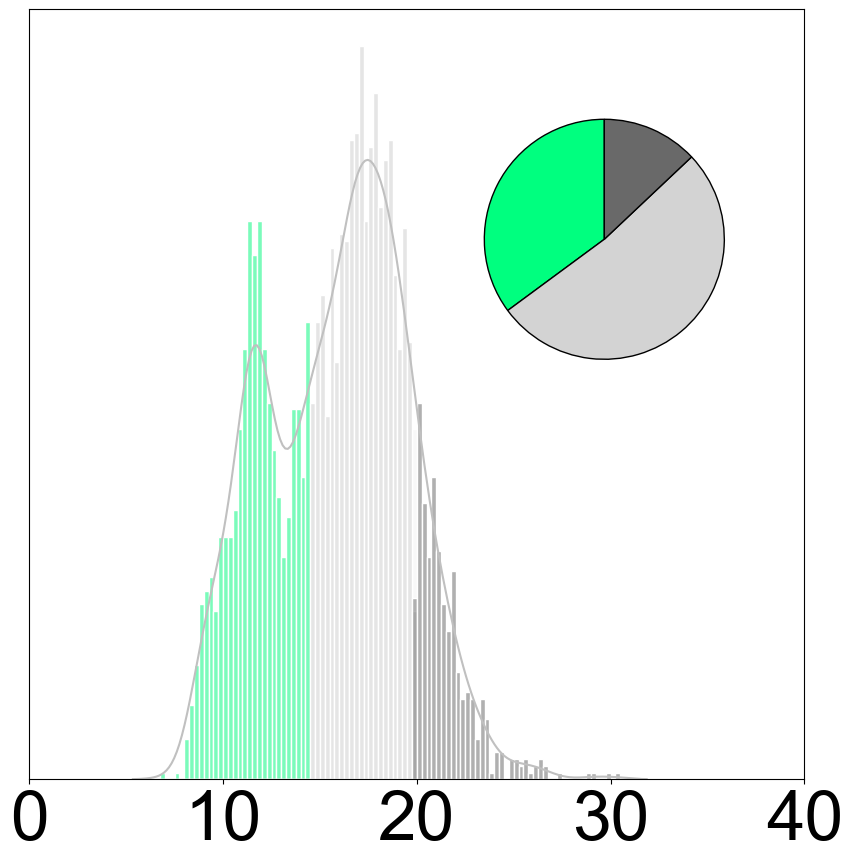

In [10]:

def distrplot(br_data, mcolor, Freq1, Freq2, Freq3, title, group1_range, group2_range,group3_range):
    plt.figure(figsize=(10, 10))
    
    bins = np.arange(3, 40, 0.25)
    
    plt.xlim(0,40)
    
    # Plot the histogram for the entire data
    sns.histplot(br_data[0], bins=bins, color='silver', alpha=0.1, stat='count', linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[0]))
    print(len(br_data[0]))
    
    # Plot the groups in different colors
    sns.histplot(br_data[0][(br_data[0] >= group1_range[0]) & (br_data[0] < group1_range[1])], bins=bins, color='springgreen', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group2_range[0]) & (br_data[0] < group2_range[1])], bins=bins, color='lightgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group3_range[0]) & (br_data[0] < group3_range[1])], bins=bins, color='dimgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')

    plt.xticks(np.arange(0, 41, 10), fontsize=50, fontname='Arial')
    plt.yticks([])
    
    plt.ylabel('')
    plt.axes([.55, .5, .3, .3], facecolor='y')
    plt.pie([Freq1, Freq2,Freq3], colors=[mcolor, 'lightgrey', 'dimgray'], explode=(0, 0,0), startangle=90, labeldistance=0.01,
             wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 50, 'fontname': 'Arial'})
    
    plt.savefig(str(title) + '.png', transparent=True, dpi='figure')
    
data = [np.concatenate((distance_Designed_1,distance_Designed_2,distance_Designed_3))]
distrplot(data,'springgreen',0.3511,0.5192,0.1296,'1A53D_combined',[3,14.50],[14.50,19.88],[19.88,39.75]) 





Peak at x = 10.375, y = 137
Peak at x = 19.625, y = 59
Peak at x = 24.625, y = 28
Peak at x = 30.625, y = 2
Region 1:
  Range: 3.00 to 15.00
  Relative Frequency: 0.5263
Region 2:
  Range: 15.00 to 22.12
  Relative Frequency: 0.3059
Region 3:
  Range: 22.12 to 27.62
  Relative Frequency: 0.1538
Region 4:
  Range: 27.62 to 39.75
  Relative Frequency: 0.0139


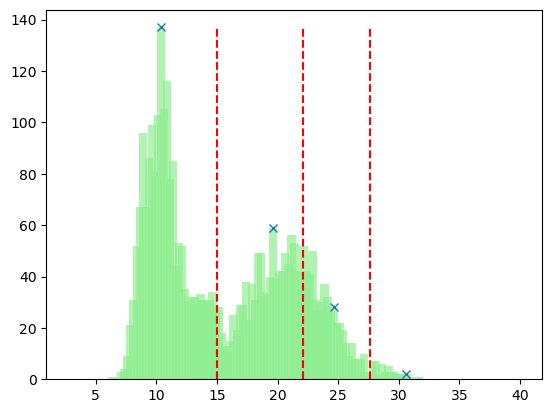

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

data = np.concatenate((distance_Shell_1,distance_Shell_2,distance_Shell_3))


bins = np.arange(3,40,0.25)

# Plotting the histogram
hist, bin_edges = np.histogram(data, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Find peaks
peaks, _ = find_peaks(hist,distance=20)

# Plot the histogram and the peaks
#plt.bar(bin_centers, hist, width=0.7, color='lightgreen', alpha=0.7)
#plt.plot(bin_centers[peaks], hist[peaks], "x")

# Show the plot
#plt.show()

# Print the peak values
for peak in peaks:
    print(f"Peak at x = {bin_centers[peak]}, y = {hist[peak]}")
    
    
# Calculate the midpoints between peaks
midpoints = [(bin_centers[peaks[i]] + bin_centers[peaks[i+1]]) / 2 for i in range(len(peaks) - 1)]

# Add boundaries for the first and last region
boundaries = [bin_edges[0]] + midpoints + [bin_edges[-1]]

# Dividing data based on boundaries
regions = []
for i in range(len(boundaries) - 1):
    region = data[(data >= boundaries[i]) & (data < boundaries[i + 1])]
    regions.append(region)

# Calculate relative frequencies
total_count = len(data)
relative_frequencies = [len(region) / total_count for region in regions]

# Print the regions and their relative frequencies
for i, region in enumerate(regions):
    print(f"Region {i+1}:")
    print(f"  Range: {boundaries[i]:.2f} to {boundaries[i+1]:.2f}")
    print(f"  Relative Frequency: {relative_frequencies[i]:.4f}")

# Plot the histogram and the peaks
plt.bar(bin_centers, hist, width=0.7, color='lightgreen', alpha=0.7)
plt.plot(bin_centers[peaks], hist[peaks], "x")
plt.vlines(midpoints, 0, max(hist), color='red', linestyle='--')  # Mark midpoints

# Show the plot
plt.show()

In [12]:
data2 = [round(x,1) for x in data]
indice_1 = data2.index(10.4)
indice_2 = data2.index(19.6)
indice_3 = data2.index(24.6)


print(indice_1+1,indice_2+1,indice_3+1)

26 665 1938


14.32098607867976
3302


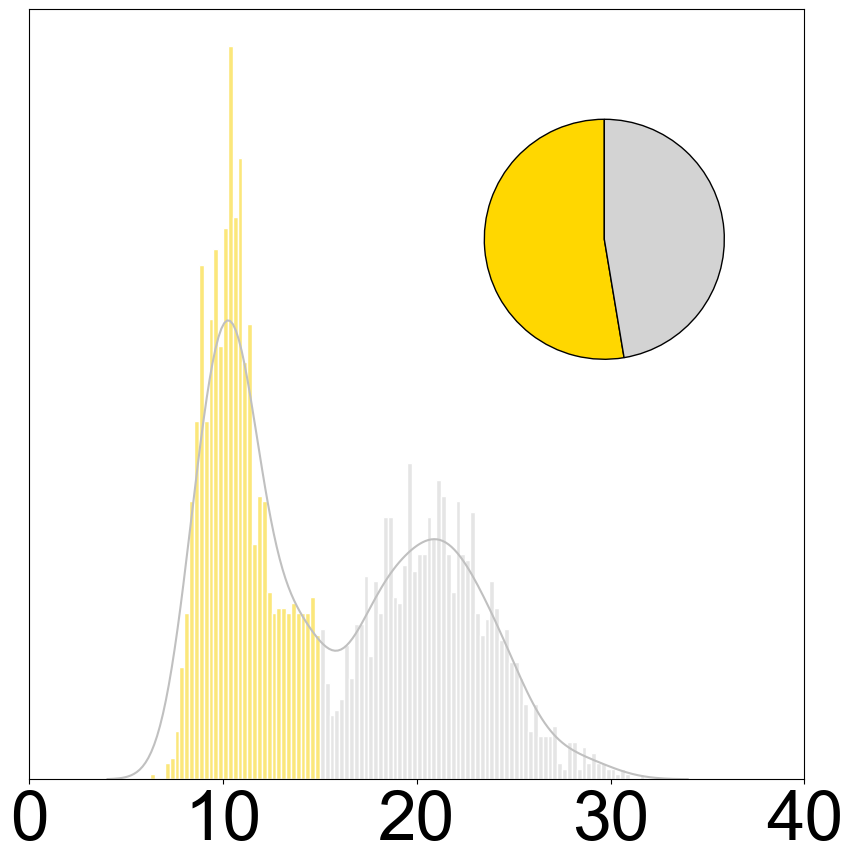

In [13]:
# Two states
def distrplot(br_data, mcolor, Freq1, Freq2, title, group1_range, group2_range):
    plt.figure(figsize=(10, 10))
    
    bins = np.arange(3, 40, 0.25)
    
    plt.xlim(0,40)
    
    # Plot the histogram for the entire data
    sns.histplot(br_data[0], bins=bins, color='silver', alpha=0.1, stat='count', linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[0]))
    print(len(br_data[0]))
    
    # Plot the groups in different colors
    sns.histplot(br_data[0][(br_data[0] >= group1_range[0]) & (br_data[0] < group1_range[1])], bins=bins, color='gold', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group2_range[0]) & (br_data[0] < group2_range[1])], bins=bins, color='lightgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')

    plt.xticks(np.arange(0, 41, 10), fontsize=50, fontname='Arial')
    plt.yticks([])
    
    plt.ylabel('')
    plt.axes([.55, .5, .3, .3], facecolor='y')
    plt.pie([Freq1, Freq2], colors=[mcolor, 'lightgrey'], explode=(0, 0), startangle=90, labeldistance=0.01,
             wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 50, 'fontname': 'Arial'})
    
    plt.savefig(str(title) + '.png', transparent=True, dpi='figure')
    
data = [np.concatenate((distance_Shell_1,distance_Shell_2,distance_Shell_3))]
distrplot(data,'gold',0.5263,0.4736,'1A53S_combined',[3,15],[15,39.75]) 









14.32098607867976
3302


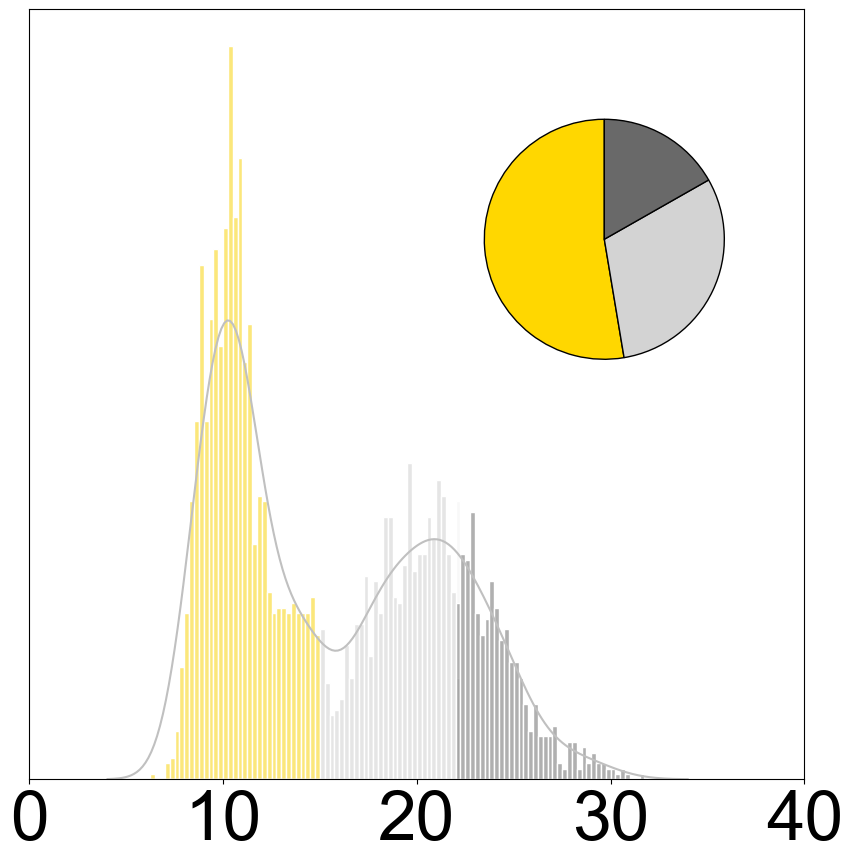

In [14]:

def distrplot(br_data, mcolor, Freq1, Freq2, Freq3, title, group1_range, group2_range,group3_range):
    plt.figure(figsize=(10, 10))
    
    bins = np.arange(3, 40, 0.25)
    
    plt.xlim(0,40)
    
    # Plot the histogram for the entire data
    sns.histplot(br_data[0], bins=bins, color='silver', alpha=0.1, stat='count', linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[0]))
    print(len(br_data[0]))
    
    # Plot the groups in different colors
    sns.histplot(br_data[0][(br_data[0] >= group1_range[0]) & (br_data[0] < group1_range[1])], bins=bins, color='gold', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group2_range[0]) & (br_data[0] < group2_range[1])], bins=bins, color='lightgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group3_range[0]) & (br_data[0] < group3_range[1])], bins=bins, color='dimgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')

    plt.xticks(np.arange(0, 41, 10), fontsize=50, fontname='Arial')
    plt.yticks([])
    
    plt.ylabel('')
    plt.axes([.55, .5, .3, .3], facecolor='y')
    plt.pie([Freq1, Freq2,Freq3], colors=[mcolor, 'lightgrey', 'dimgray'], explode=(0, 0,0), startangle=90, labeldistance=0.01,
             wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 50, 'fontname': 'Arial'})
    
    plt.savefig(str(title) + '.png', transparent=True, dpi='figure')
    
data = [np.concatenate((distance_Shell_1,distance_Shell_2,distance_Shell_3))]
distrplot(data,'gold',0.5263,0.3059,0.1677,'1A53S_combined',[3,15],[15,22.1],[22.1,39.75]) 









Peak at x = 7.625, y = 1
Peak at x = 11.625, y = 111
Peak at x = 14.875, y = 106
Peak at x = 18.375, y = 57
Peak at x = 20.875, y = 15
Peak at x = 23.875, y = 1
Region 1:
  Range: 3.00 to 9.62
  Relative Frequency: 0.0639
Region 2:
  Range: 9.62 to 13.25
  Relative Frequency: 0.3908
Region 3:
  Range: 13.25 to 16.62
  Relative Frequency: 0.3302
Region 4:
  Range: 16.62 to 19.62
  Relative Frequency: 0.1666
Region 5:
  Range: 19.62 to 22.38
  Relative Frequency: 0.0460
Region 6:
  Range: 22.38 to 39.75
  Relative Frequency: 0.0024


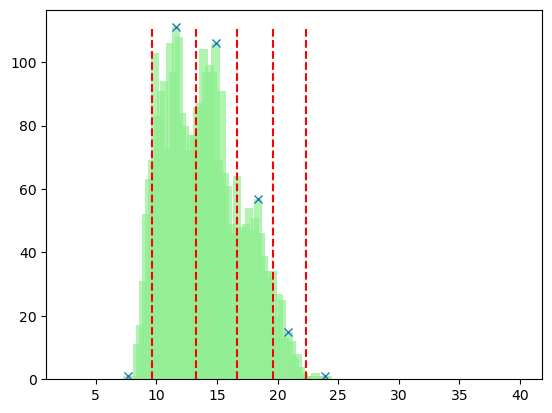

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

data = np.concatenate((distance_Core_1,distance_Core_2,distance_Core_3))


bins = np.arange(3,40,0.25)

# Plotting the histogram
hist, bin_edges = np.histogram(data, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Find peaks
peaks, _ = find_peaks(hist,distance=10)

# Plot the histogram and the peaks
#plt.bar(bin_centers, hist, width=0.7, color='lightgreen', alpha=0.7)
#plt.plot(bin_centers[peaks], hist[peaks], "x")

# Show the plot
#plt.show()

# Print the peak values
for peak in peaks:
    print(f"Peak at x = {bin_centers[peak]}, y = {hist[peak]}")
    
    
# Calculate the midpoints between peaks
midpoints = [(bin_centers[peaks[i]] + bin_centers[peaks[i+1]]) / 2 for i in range(len(peaks) - 1)]

# Add boundaries for the first and last region
boundaries = [bin_edges[0]] + midpoints + [bin_edges[-1]]

# Dividing data based on boundaries
regions = []
for i in range(len(boundaries) - 1):
    region = data[(data >= boundaries[i]) & (data < boundaries[i + 1])]
    regions.append(region)

# Calculate relative frequencies
total_count = len(data)
relative_frequencies = [len(region) / total_count for region in regions]

# Print the regions and their relative frequencies
for i, region in enumerate(regions):
    print(f"Region {i+1}:")
    print(f"  Range: {boundaries[i]:.2f} to {boundaries[i+1]:.2f}")
    print(f"  Relative Frequency: {relative_frequencies[i]:.4f}")

# Plot the histogram and the peaks
plt.bar(bin_centers, hist, width=0.7, color='lightgreen', alpha=0.7)
plt.plot(bin_centers[peaks], hist[peaks], "x")
plt.vlines(midpoints, 0, max(hist), color='red', linestyle='--')  # Mark midpoints

# Show the plot
plt.show()

In [16]:
data2 = [round(x,1) for x in data]
indice_1 = data2.index(11.6)
indice_2 = data2.index(14.9)
indice_3 = data2.index(18.4)


print(indice_1+1,indice_2+1,indice_3+1)

15 31 8


13.679243112719568
3301


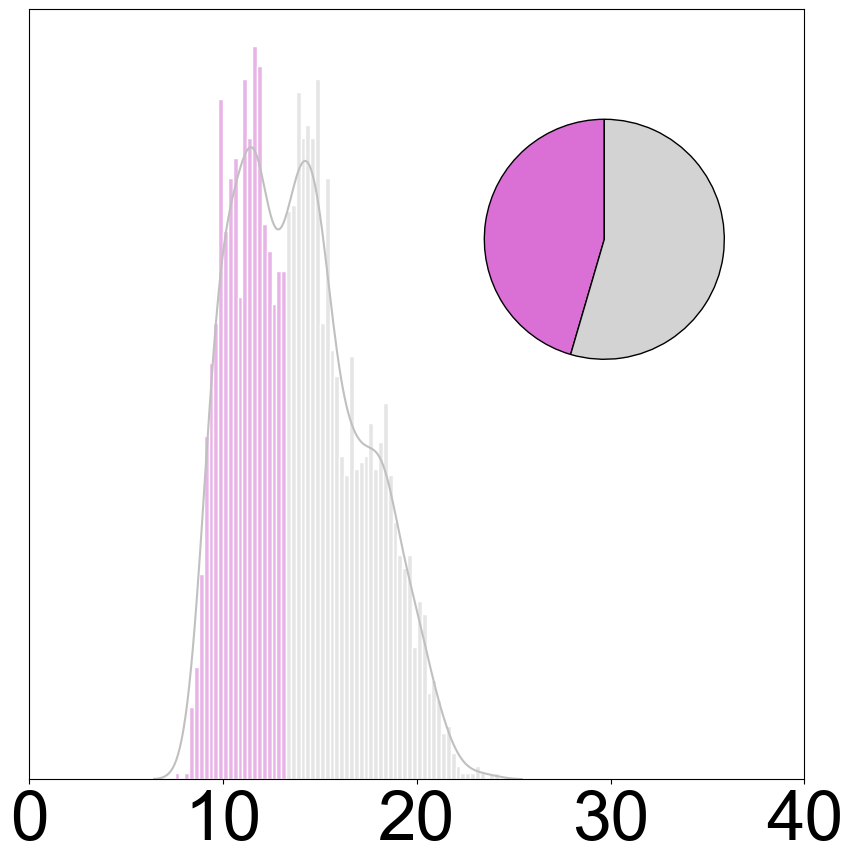

In [18]:
# Two states

def distrplot(br_data, mcolor, Freq1, Freq2, title, group1_range, group2_range):
    plt.figure(figsize=(10, 10))
    
    bins = np.arange(3, 41, 0.25)
    
    plt.xlim(5,40)

    # Plot the histogram for the entire data
    sns.histplot(br_data[0], bins=bins, color='silver', alpha=0.1, stat='count', linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[0]))
    print(len(br_data[0]))
    
    # Plot the groups in different colors
    sns.histplot(br_data[0][(br_data[0] >= group1_range[0]) & (br_data[0] < group1_range[1])], bins=bins, color=mcolor, alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group2_range[0]) & (br_data[0] < group2_range[1])], bins=bins, color='lightgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    
    plt.xticks(np.arange(0, 41, 10), fontsize=50, fontname='Arial')
    plt.yticks([])
    
    plt.ylabel('')
    plt.axes([.55, .5, .3, .3], facecolor='y')
    plt.pie([Freq1, Freq2], colors=[mcolor, 'lightgrey'], explode=(0, 0), startangle=90, labeldistance=0.01,
             wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 50, 'fontname': 'Arial'})
    
    plt.savefig(str(title) + '.png', transparent=True, dpi='figure')
    
data = [np.concatenate((distance_Core_1,distance_Core_2,distance_Core_3))]
distrplot(data,'orchid',0.4547,0.5453,'1A53C_combined',[3,13.25],[13.25,39.75]) 





13.679243112719568
3301


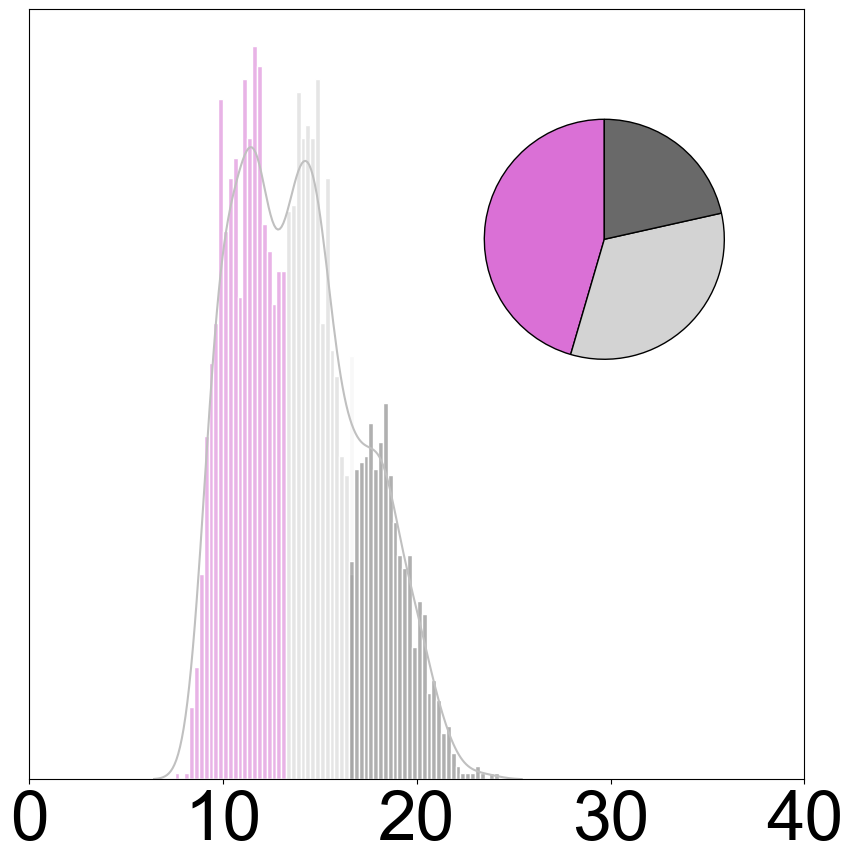

In [17]:

def distrplot(br_data, mcolor, Freq1, Freq2, Freq3, title, group1_range, group2_range, group3_range):
    plt.figure(figsize=(10, 10))
    
    bins = np.arange(3, 41, 0.25)
    
    plt.xlim(5,40)

    # Plot the histogram for the entire data
    sns.histplot(br_data[0], bins=bins, color='silver', alpha=0.1, stat='count', linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[0]))
    print(len(br_data[0]))
    
    # Plot the groups in different colors
    sns.histplot(br_data[0][(br_data[0] >= group1_range[0]) & (br_data[0] < group1_range[1])], bins=bins, color=mcolor, alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group2_range[0]) & (br_data[0] < group2_range[1])], bins=bins, color='lightgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group3_range[0]) & (br_data[0] < group3_range[1])], bins=bins, color='dimgray', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    
    plt.xticks(np.arange(0, 41, 10), fontsize=50, fontname='Arial')
    plt.yticks([])
    
    plt.ylabel('')
    plt.axes([.55, .5, .3, .3], facecolor='y')
    plt.pie([Freq1, Freq2, Freq3], colors=[mcolor, 'lightgrey', 'dimgray'], explode=(0, 0, 0), startangle=90, labeldistance=0.01,
             wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 50, 'fontname': 'Arial'})
    
    plt.savefig(str(title) + '.png', transparent=True, dpi='figure')
    
data = [np.concatenate((distance_Core_1,distance_Core_2,distance_Core_3))]
distrplot(data,'orchid',0.4547,0.3302,0.215,'1A53C_combined',[3,13.25],[13.25,16.62],[16.62,39.75]) 





Peak at x = 9.625, y = 116
Peak at x = 17.375, y = 57
Peak at x = 30.125, y = 17
Region 1:
  Range: 3.00 to 13.50
  Relative Frequency: 0.4699
Region 2:
  Range: 13.50 to 23.75
  Relative Frequency: 0.4284
Region 3:
  Range: 23.75 to 39.75
  Relative Frequency: 0.1018


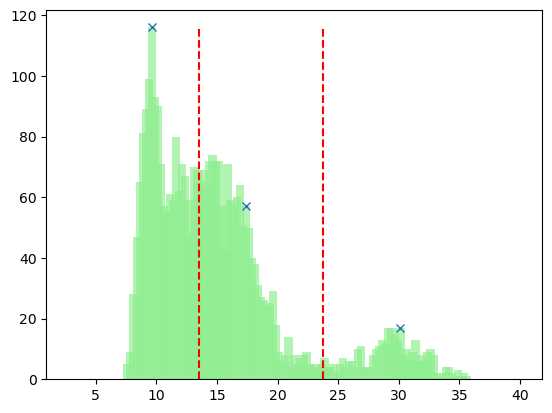

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

data = np.concatenate((distance_Evolved_1,distance_Evolved_2,distance_Evolved_3))


bins = np.arange(3,40,0.25)

# Plotting the histogram
hist, bin_edges = np.histogram(data, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Find peaks
peaks, _ = find_peaks(hist,distance=30)

# Plot the histogram and the peaks
#plt.bar(bin_centers, hist, width=0.7, color='lightgreen', alpha=0.7)
#plt.plot(bin_centers[peaks], hist[peaks], "x")

# Show the plot
#plt.show()

# Print the peak values
for peak in peaks:
    print(f"Peak at x = {bin_centers[peak]}, y = {hist[peak]}")
    
    
# Calculate the midpoints between peaks
midpoints = [(bin_centers[peaks[i]] + bin_centers[peaks[i+1]]) / 2 for i in range(len(peaks) - 1)]

# Add boundaries for the first and last region
boundaries = [bin_edges[0]] + midpoints + [bin_edges[-1]]

# Dividing data based on boundaries
regions = []
for i in range(len(boundaries) - 1):
    region = data[(data >= boundaries[i]) & (data < boundaries[i + 1])]
    regions.append(region)

# Calculate relative frequencies
total_count = len(data)
relative_frequencies = [len(region) / total_count for region in regions]

# Print the regions and their relative frequencies
for i, region in enumerate(regions):
    print(f"Region {i+1}:")
    print(f"  Range: {boundaries[i]:.2f} to {boundaries[i+1]:.2f}")
    print(f"  Relative Frequency: {relative_frequencies[i]:.4f}")

# Plot the histogram and the peaks
plt.bar(bin_centers, hist, width=0.7, color='lightgreen', alpha=0.7)
plt.plot(bin_centers[peaks], hist[peaks], "x")
plt.vlines(midpoints, 0, max(hist), color='red', linestyle='--')  # Mark midpoints

# Show the plot
plt.show()

In [20]:
data2 = [round(x,1) for x in data]
indice_1 = data2.index(9.6)
indice_2 = data2.index(17.4)
indice_3 = data2.index(30.1)


print(indice_1+1,indice_2+1,indice_3+1)

2 647 3069


In [ ]:
# Two states

def distrplot(br_data, mcolor, Freq1, Freq2,  title, group1_range, group2_range):
    plt.figure(figsize=(10, 10))
    
    bins = np.arange(3, 41, 0.25)
    
    plt.xlim(5,40)

    # Plot the histogram for the entire data
    sns.histplot(br_data[0], bins=bins, color='silver', alpha=0.1, stat='count', linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[0]))
    print(len(br_data[0]))
    
    # Plot the groups in different colors
    sns.histplot(br_data[0][(br_data[0] >= group1_range[0]) & (br_data[0] < group1_range[1])], bins=bins, color=mcolor, alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group2_range[0]) & (br_data[0] < group2_range[1])], bins=bins, color='lightgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    
    plt.xticks(np.arange(0, 41, 10), fontsize=50, fontname='Arial')
    plt.yticks([])
    
    plt.ylabel('')
    plt.axes([.55, .5, .3, .3], facecolor='y')
    plt.pie([Freq1, Freq2], colors=[mcolor, 'lightgrey'], explode=(0, 0), startangle=90, labeldistance=0.01,
             wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 50, 'fontname': 'Arial'})
    
    plt.savefig(str(title) + '.png', transparent=True, dpi='figure')
    
data = [np.concatenate((distance_Evolved_1,distance_Evolved_2,distance_Evolved_3))]
distrplot(data,'deepskyblue',0.8983,0.1018,'1A53E_combined',[3,23.75],[23.75,39.75]) 





13.866537119070284
3301


13.866537119070284
3301


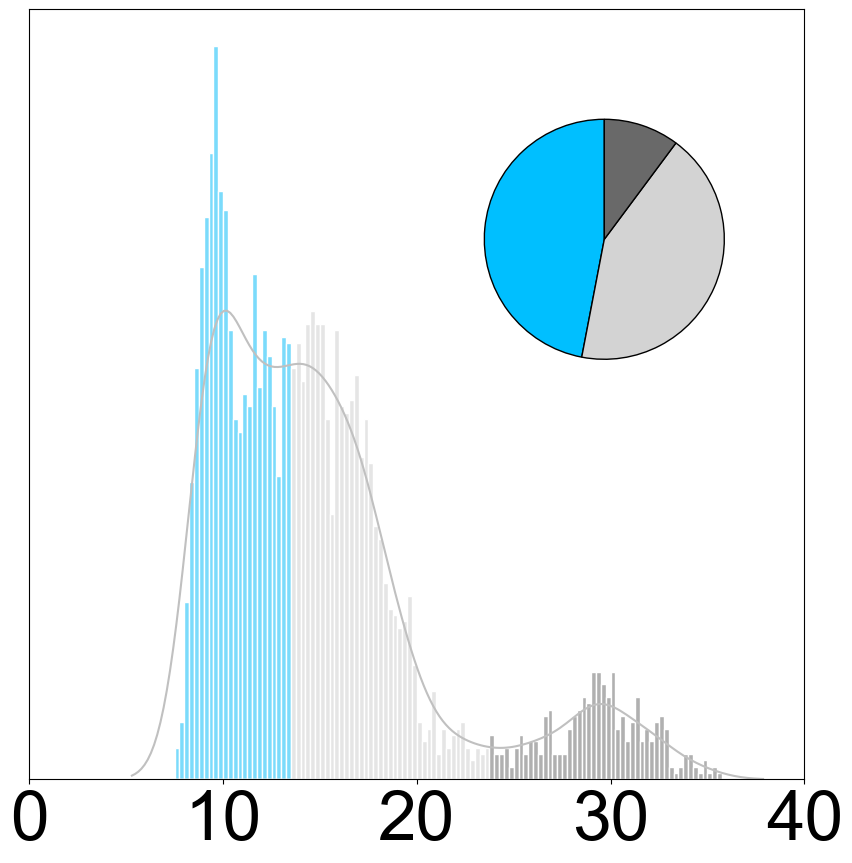

In [50]:

def distrplot(br_data, mcolor, Freq1, Freq2, Freq3, title, group1_range, group2_range, group3_range):
    plt.figure(figsize=(10, 10))
    
    bins = np.arange(3, 41, 0.25)
    
    plt.xlim(5,40)

    # Plot the histogram for the entire data
    sns.histplot(br_data[0], bins=bins, color='silver', alpha=0.1, stat='count', linewidth=1, discrete=False, edgecolor='white', kde=True, kde_kws={'cut': 2})
    print(np.median(br_data[0]))
    print(len(br_data[0]))
    
    # Plot the groups in different colors
    sns.histplot(br_data[0][(br_data[0] >= group1_range[0]) & (br_data[0] < group1_range[1])], bins=bins, color=mcolor, alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group2_range[0]) & (br_data[0] < group2_range[1])], bins=bins, color='lightgrey', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    sns.histplot(br_data[0][(br_data[0] >= group3_range[0]) & (br_data[0] < group3_range[1])], bins=bins, color='dimgray', alpha=0.5, stat='count', linewidth=1, edgecolor='white')
    
    plt.xticks(np.arange(0, 41, 10), fontsize=50, fontname='Arial')
    plt.yticks([])
    
    plt.ylabel('')
    plt.axes([.55, .5, .3, .3], facecolor='y')
    plt.pie([Freq1, Freq2, Freq3], colors=[mcolor, 'lightgrey', 'dimgray'], explode=(0, 0, 0), startangle=90, labeldistance=0.01,
             wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True}, textprops={'fontsize': 50, 'fontname': 'Arial'})
    
    plt.savefig(str(title) + '.png', transparent=True, dpi='figure')
    
data = [np.concatenate((distance_Evolved_1,distance_Evolved_2,distance_Evolved_3))]
distrplot(data,'deepskyblue',0.4699,0.4284,0.1018,'1A53E_combined',[3,13.50],[13.50,23.75],[23.75,39.75]) 



